Segmentation using Age , Annual Income and Spending Score

3D https://www.kaggle.com/kushal1996/customer-segmentation-k-means-analysis

2d https://www.kaggle.com/shrutimechlearn/step-by-step-kmeans-explained-in-detail/data
    
    
Implicit objective function in k-Means measures sum of distances of observations from their cluster centroids, 
called Within-Cluster-Sum-of-Squares (WCSS). 
Elbow-Method using WCSS 

https://www.edupristine.com/blog/beyond-k-means




#Selecting N Clusters based in Inertia (Squared Distance between Centroids and data points, should be less)

In [1]:
from IPython.display import Image


In [2]:
Image(url='https://thegoodpython.com/assets/images/iris-species.png')


In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [14]:
data=pd.read_csv("Iris.csv",index_col=0)
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [16]:
data['Species'].value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Species, dtype: int64

Wykres słupkowy Bar Plot: w tym typie wykresu wykreślamy częstotliwość obserwacji, w tym przykładzie trzech gatunków w zestawie danych Iris

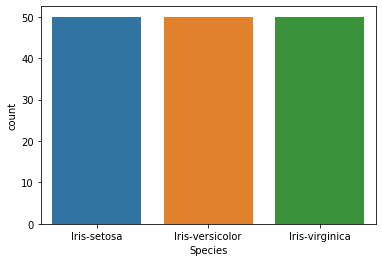

In [17]:
sns.countplot('Species',data=data)
plt.show()

Trudno jest przewidzieć optymalną liczbę klastrów lub wartość k. Aby znaleźć liczbę klastrów, musimy uruchomić algorytm grupowania k-średnich dla zakresu wartości k i porównać wyniki.

Teraz wybieramy wszystkie cztery cechy (długość płatka, szerokość płatka, długość kielicha i szerokość kielicha) z zestawu danych i przypisujemy do zmiennej cechy_iris abyśmy mogli trenować nasz model z tymi funkcjami (cechami)

In [23]:
cechy_iris = data.iloc[:, [0,1,2,3]].values
cechy_iris[:10] # mamy podgląd 10 pierwszych wierszy


array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

Na początek, dowolnie przypiszmy wartość k jako 5. Zaimplementujemy grupowanie k-średnich za pomocą k = 5.

In [26]:
kmeans_5 = KMeans(n_clusters=5) # utworzyliśmy instancję klasy KMeans i przypisaliśmy ją do zmiennej kmeans_5
grupowanie_5 = kmeans_5.fit_predict(cechy_iris)
print(grupowanie_5)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 3 0 0 0 3 0 3 3 0 3 0 3 0 0 3 0 3 0 3 0 0
 0 0 0 0 0 3 3 3 3 0 3 0 0 0 3 3 3 0 3 3 3 3 3 0 3 3 4 0 2 4 4 2 3 2 4 2 4
 4 4 0 4 4 4 2 2 0 4 0 2 0 4 2 0 0 4 2 2 2 4 0 0 2 4 4 0 4 4 4 0 4 4 4 0 4
 4 0]


Możemy znaleźć centra 5 klastrów utworzonych z danych

In [27]:
kmeans_5.cluster_centers_

array([[6.20769231, 2.85384615, 4.74615385, 1.56410256],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [7.475     , 3.125     , 6.3       , 2.05      ],
       [5.508     , 2.6       , 3.908     , 1.204     ],
       [6.52916667, 3.05833333, 5.50833333, 2.1625    ]])

In [51]:
cechy_iris[grupowanie_5==0,0]

array([7. , 6.4, 6.9, 6.5, 5.7, 6.3, 6.6, 5.9, 6.1, 6.7, 5.6, 6.2, 5.9,
       6.3, 6.1, 6.4, 6.6, 6.8, 6.7, 6. , 6. , 6. , 6.7, 6.3, 6.1, 6.2,
       5.8, 5.7, 6. , 5.6, 6.3, 6.2, 6.1, 6.3, 6.1, 6. , 5.8, 6.3, 5.9])

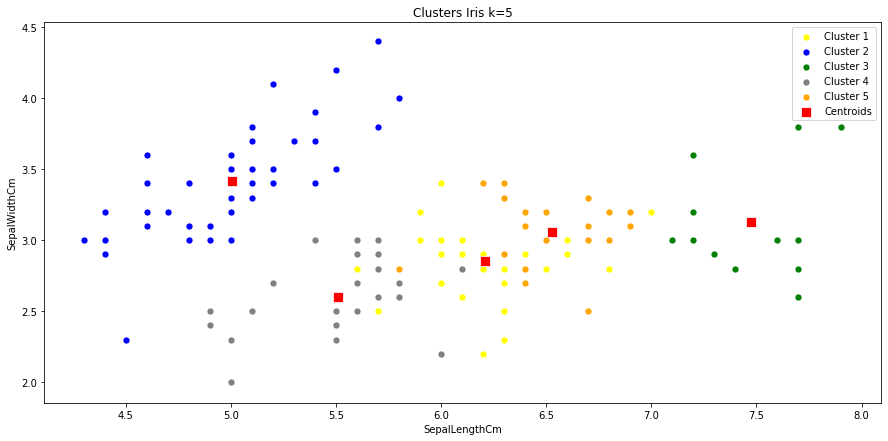

In [61]:
# Visualising the clusters

plt.figure(figsize=(15,7))
sns.scatterplot(cechy_iris[grupowanie_5 == 0, 0], cechy_iris[grupowanie_5 == 0, 1], color = 'yellow', label = 'Cluster 1',s=50)
sns.scatterplot(cechy_iris[grupowanie_5 == 1, 0], cechy_iris[grupowanie_5 == 1, 1], color = 'blue', label = 'Cluster 2',s=50)
sns.scatterplot(cechy_iris[grupowanie_5 == 2, 0], cechy_iris[grupowanie_5 == 2, 1], color = 'green', label = 'Cluster 3',s=50)
sns.scatterplot(cechy_iris[grupowanie_5 == 3, 0], cechy_iris[grupowanie_5 == 3, 1], color = 'grey', label = 'Cluster 4',s=50)
sns.scatterplot(cechy_iris[grupowanie_5 == 4, 0], cechy_iris[grupowanie_5 == 4, 1], color = 'orange', label = 'Cluster 5',s=50)

sns.scatterplot(kmeans_5.cluster_centers_[:, 0], kmeans_5.cluster_centers_[:, 1], color = 'red', 
                label = 'Centroids',s=100,marker=',')
plt.grid(False)
plt.title('Clusters Iris k=5')
plt.xlabel('SepalLengthCm')
plt.ylabel('SepalWidthCm')
plt.legend()
plt.show()

# source: https://www.kaggle.com/shrutimechlearn/step-by-step-kmeans-explained-in-detail/data

## krok po kroku jak jest zrobiony wykres

Trzeba pamiętać że jest to wykres 2D więc musimy wziąć dwie zmienne z czterech. Bierzemy dwie pierwsze (tzn kolumna 0 i 1 z cechy iris), Dlatego na wykresie widzimy to: cechy_iris [grupowanie_5 == 0, 0]  i cechy_iris [grupowanie_5 == 0, 1]

In [63]:
cechy_iris # to są nasze surowe dane, cztery kolunmy=cztery zmienne (SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm)

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [62]:
grupowanie_5 # wynik pogrupowania danych w pięc klastrów (0,1,2,3,4)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 3, 0, 0, 0, 3, 0, 3, 3, 0, 3, 0, 3, 0,
       0, 3, 0, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 0, 3, 0, 0, 0,
       3, 3, 3, 0, 3, 3, 3, 3, 3, 0, 3, 3, 4, 0, 2, 4, 4, 2, 3, 2, 4, 2,
       4, 4, 4, 0, 4, 4, 4, 2, 2, 0, 4, 0, 2, 0, 4, 2, 0, 0, 4, 2, 2, 2,
       4, 0, 0, 2, 4, 4, 0, 4, 4, 4, 0, 4, 4, 4, 0, 4, 4, 0])

In [64]:
grupowanie_5==0 # sprawdzany jest warunek czy należy do klasy 0, True=0

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True,  True, False,
        True,  True,  True, False,  True, False, False,  True, False,
        True, False,  True,  True, False,  True, False,  True, False,
        True,  True,  True,  True,  True,  True,  True, False, False,
       False, False,  True, False,  True,  True,  True, False, False,
       False,  True, False, False, False, False, False,  True, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False,  True, False,  True, False,  True, False, False,
        True,  True,

In [71]:
kmeans_5.cluster_centers_

array([[6.20769231, 2.85384615, 4.74615385, 1.56410256],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [7.475     , 3.125     , 6.3       , 2.05      ],
       [5.508     , 2.6       , 3.908     , 1.204     ],
       [6.52916667, 3.05833333, 5.50833333, 2.1625    ]])

In [73]:
cechy_iris[grupowanie_5==0] # tu są wyciągnięte dane z wartościami pasującymi do wartości pierwszego centrum 
                            # które możemy odczytać z kmeans_5.cluster_centers_ (pierwszy wiersz)

array([[7. , 3.2, 4.7, 1.4],
       [6.4, 3.2, 4.5, 1.5],
       [6.9, 3.1, 4.9, 1.5],
       [6.5, 2.8, 4.6, 1.5],
       [5.7, 2.8, 4.5, 1.3],
       [6.3, 3.3, 4.7, 1.6],
       [6.6, 2.9, 4.6, 1.3],
       [5.9, 3. , 4.2, 1.5],
       [6.1, 2.9, 4.7, 1.4],
       [6.7, 3.1, 4.4, 1.4],
       [5.6, 3. , 4.5, 1.5],
       [6.2, 2.2, 4.5, 1.5],
       [5.9, 3.2, 4.8, 1.8],
       [6.3, 2.5, 4.9, 1.5],
       [6.1, 2.8, 4.7, 1.2],
       [6.4, 2.9, 4.3, 1.3],
       [6.6, 3. , 4.4, 1.4],
       [6.8, 2.8, 4.8, 1.4],
       [6.7, 3. , 5. , 1.7],
       [6. , 2.9, 4.5, 1.5],
       [6. , 2.7, 5.1, 1.6],
       [6. , 3.4, 4.5, 1.6],
       [6.7, 3.1, 4.7, 1.5],
       [6.3, 2.3, 4.4, 1.3],
       [6.1, 3. , 4.6, 1.4],
       [6.2, 2.9, 4.3, 1.3],
       [5.8, 2.7, 5.1, 1.9],
       [5.7, 2.5, 5. , 2. ],
       [6. , 2.2, 5. , 1.5],
       [5.6, 2.8, 4.9, 2. ],
       [6.3, 2.7, 4.9, 1.8],
       [6.2, 2.8, 4.8, 1.8],
       [6.1, 3. , 4.9, 1.8],
       [6.3, 2.8, 5.1, 1.5],
       [6.1, 2

In [70]:
cechy_iris[grupowanie_5==1] # tu są wyciągnięte dane z wartościami pasującymi do wartości drugiego centrum 
                            # które możemy odczytać z kmeans_5.cluster_centers_ (drugi wiersz 5.006, 3.418, 1.464, 0.244 )

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [72]:
cechy_iris[grupowanie_5==2] # tu są wyciągnięte dane z wartościami pasującymi do wartości trzeciego centrum 
                            # które możemy odczytać z kmeans_5.cluster_centers_ (trzeci wiersz 7.475,3.125,6.3 , 2.05 )

array([[7.1, 3. , 5.9, 2.1],
       [7.6, 3. , 6.6, 2.1],
       [7.3, 2.9, 6.3, 1.8],
       [7.2, 3.6, 6.1, 2.5],
       [7.7, 3.8, 6.7, 2.2],
       [7.7, 2.6, 6.9, 2.3],
       [7.7, 2.8, 6.7, 2. ],
       [7.2, 3.2, 6. , 1.8],
       [7.2, 3. , 5.8, 1.6],
       [7.4, 2.8, 6.1, 1.9],
       [7.9, 3.8, 6.4, 2. ],
       [7.7, 3. , 6.1, 2.3]])

# Elbow methods, metoda łokcia

Istnieje metoda o nazwie Elbow, która ma na celu znalezienie optymalnej liczby klastrów w zbiorze danych. Użyjmy tej metody, żeby obliczyć optymalną wartość k. Aby wdrożyć metodę Elbow, utworzymy kod pokazany poniżej, oraz narysujemy wykres gdzie na osi x umieścimy liczbę klastrów a na osi y odpowednią wartość błędu.
Ten wykres zazwyczaj ma kształt łokcia, stąd jego nazwa.

Selecting N Clusters based in Inertia (Squared Distance between Centroids and data points, should be less)-ładnie powiedziane

Warotość błędu oznacza sumę odległości obserwacji od ich centroidów (cluster centroids), Within-Cluster-Sum-of-Squares (WCSS), co na polski możeny przetłumaczyć jako sumą kwadratów wewnątrz gromady. Czyli stosujemy metodę łokciową przy użyciu miary WCSS.


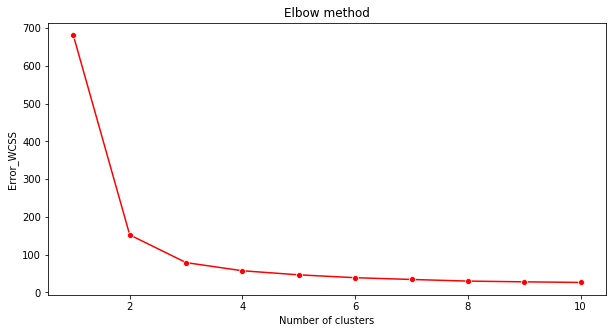

In [82]:
Error_WCSS=[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(cechy_iris)
    kmeans.fit(cechy_iris)
    Error_WCSS.append(kmeans.inertia_)
    
plt.figure(figsize=(10,5))
sns.lineplot(range(1, 11), Error_WCSS,marker='o',color='red')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Error_WCSS')
plt.show()




Na wykresie widać, że po 3 nie ma znaczącego spadku w WCSS, więc 3 jest tutaj najlepszym wyborem. Zwykle dobrym pomysłem jest wybranie numeru, w którym powstaje ten łokieć.

W takim razie wykonamy jeszcze raz klastrowanie, ale już z podziałem na trzy grupy

In [83]:
kmeans_3 = KMeans(n_clusters=3)
grupowanie_3 = kmeans_3.fit_predict(cechy_iris)
print(grupowanie_3)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [84]:
kmeans_3.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

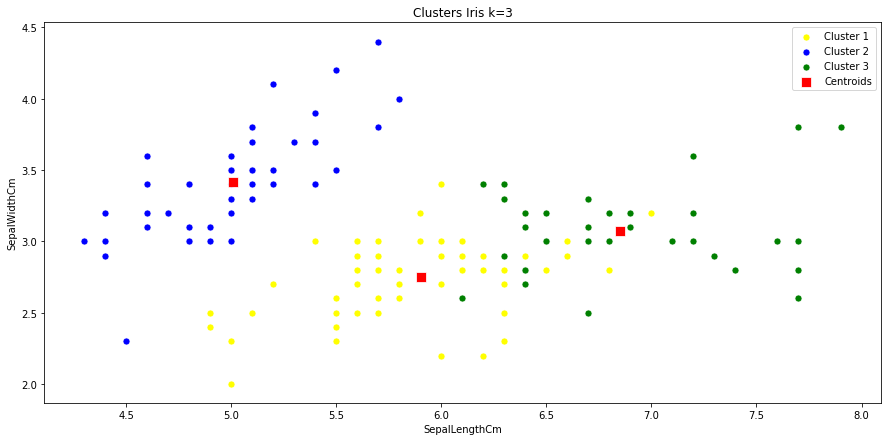

In [85]:
plt.figure(figsize=(15,7))
sns.scatterplot(cechy_iris[grupowanie_3 == 0, 0], cechy_iris[grupowanie_3 == 0, 1], color = 'yellow', label = 'Cluster 1',s=50)
sns.scatterplot(cechy_iris[grupowanie_3 == 1, 0], cechy_iris[grupowanie_3 == 1, 1], color = 'blue', label = 'Cluster 2',s=50)
sns.scatterplot(cechy_iris[grupowanie_3 == 2, 0], cechy_iris[grupowanie_3 == 2, 1], color = 'green', label = 'Cluster 3',s=50)

sns.scatterplot(kmeans_3.cluster_centers_[:, 0], kmeans_3.cluster_centers_[:, 1], color = 'red', 
                label = 'Centroids',s=100,marker=',')
plt.grid(False)
plt.title('Clusters Iris k=3')
plt.xlabel('SepalLengthCm')
plt.ylabel('SepalWidthCm')
plt.legend()
plt.show()